In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score,classification_report
from sklearn.preprocessing import OneHotEncoder,KBinsDiscretizer, label_binarize,OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.feature_selection import VarianceThreshold
from mlxtend.frequent_patterns import apriori, association_rules
from sklearn.metrics import precision_recall_fscore_support, roc_curve, roc_auc_score


import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path1="/content/drive/MyDrive/train_Insurance.csv"
df_train=pd.read_csv(path1)
df_train.head()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,NumberOfWindows,Geo_Code,Claim
0,H13501,2012,1.0,1,N,V,V,U,1240.0,Wood-framed,without,75117,non
1,H14962,2012,1.0,0,N,V,V,U,900.0,Non-combustible,without,62916,non
2,H17755,2013,1.0,1,V,N,O,R,4984.0,Non-combustible,4,31149,oui
3,H13369,2016,0.5,0,N,V,V,U,600.0,Wood-framed,without,6012,oui
4,H12988,2012,1.0,0,N,V,V,U,900.0,Non-combustible,without,57631,non


In [4]:
#nbre d'observation
print(len(df_train))

5012


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5012 entries, 0 to 5011
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer Id         5012 non-null   object 
 1   YearOfObservation   5012 non-null   int64  
 2   Insured_Period      5012 non-null   float64
 3   Residential         5012 non-null   int64  
 4   Building_Painted    5012 non-null   object 
 5   Building_Fenced     5012 non-null   object 
 6   Garden              5008 non-null   object 
 7   Settlement          5012 non-null   object 
 8   Building Dimension  4935 non-null   float64
 9   Building_Type       5012 non-null   object 
 10  NumberOfWindows     5012 non-null   object 
 11  Geo_Code            4939 non-null   object 
 12  Claim               5012 non-null   object 
dtypes: float64(2), int64(2), object(9)
memory usage: 509.2+ KB


In [6]:
df_train.describe(include="all")

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,NumberOfWindows,Geo_Code,Claim
count,5012,5012.000000,5012.000000,5012.000000,5012,5012,5008,5012,4935.000000,5012,5012,4939,5012
unique,5012,NaN,NaN,NaN,2,2,2,2,NaN,4,11,1115,2
top,H13501,NaN,NaN,NaN,V,N,O,R,NaN,Non-combustible,without,6088,non
freq,1,NaN,NaN,NaN,3763,2535,2532,2537,NaN,2310,2476,102,3886
mean,NaN,2013.660215,0.869713,0.301077,NaN,NaN,NaN,NaN,1876.898683,NaN,NaN,NaN,NaN
std,NaN,1.383134,0.219496,0.458772,NaN,NaN,NaN,NaN,2267.277397,NaN,NaN,NaN,NaN
min,NaN,2012.000000,0.500000,0.000000,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
25%,NaN,2012.000000,0.500000,0.000000,NaN,NaN,NaN,NaN,520.000000,NaN,NaN,NaN,NaN
50%,NaN,2013.000000,1.000000,0.000000,NaN,NaN,NaN,NaN,1067.000000,NaN,NaN,NaN,NaN
75%,NaN,2015.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,2280.000000,NaN,NaN,NaN,NaN


In [7]:
df_train.isna().sum()

Customer Id            0
YearOfObservation      0
Insured_Period         0
Residential            0
Building_Painted       0
Building_Fenced        0
Garden                 4
Settlement             0
Building Dimension    77
Building_Type          0
NumberOfWindows        0
Geo_Code              73
Claim                  0
dtype: int64

In [8]:
df_train.isna().sum().sum()

154

In [9]:
l_num=list(df_train.select_dtypes(include="number"))
l_discret=list(df_train.select_dtypes(include="object"))
print("l_num=",l_num)
print("l_discret=",l_discret)


l_num= ['YearOfObservation', 'Insured_Period', 'Residential', 'Building Dimension']
l_discret= ['Customer Id', 'Building_Painted', 'Building_Fenced', 'Garden', 'Settlement', 'Building_Type', 'NumberOfWindows', 'Geo_Code', 'Claim']


matrice de correlation entre les attributs numerique

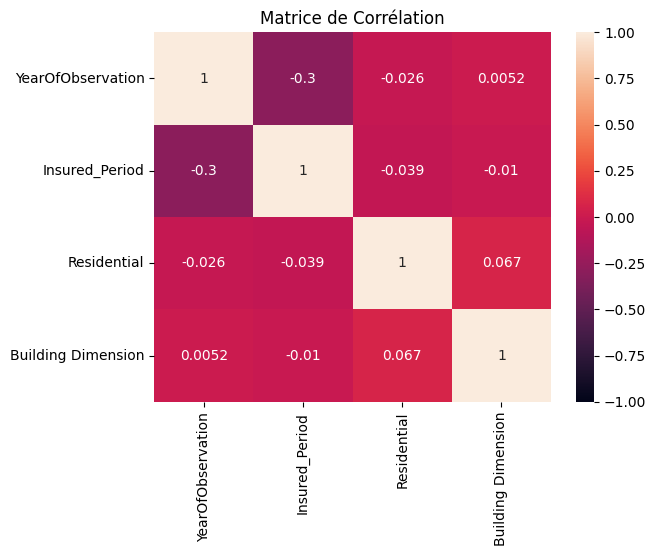

In [10]:
df_corr=df_train.corr(numeric_only=True)
sns.heatmap(df_corr, annot=True,vmin=-1, vmax=1)
plt.title('Matrice de Corrélation')
plt.show()

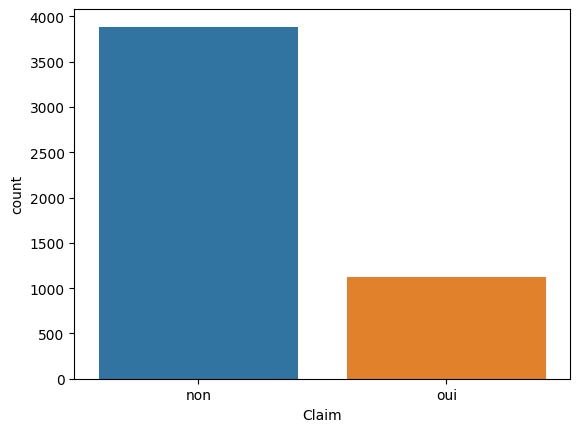

In [11]:
sns.countplot(data=df_train,x="Claim")
plt.show()

In [12]:
#on peut faire les shemas d'une facon auto:
#on fait une liste de l_vis=[year,insured,resid,building,..]
#for i in l_vis:: sns.countplot(x=i)

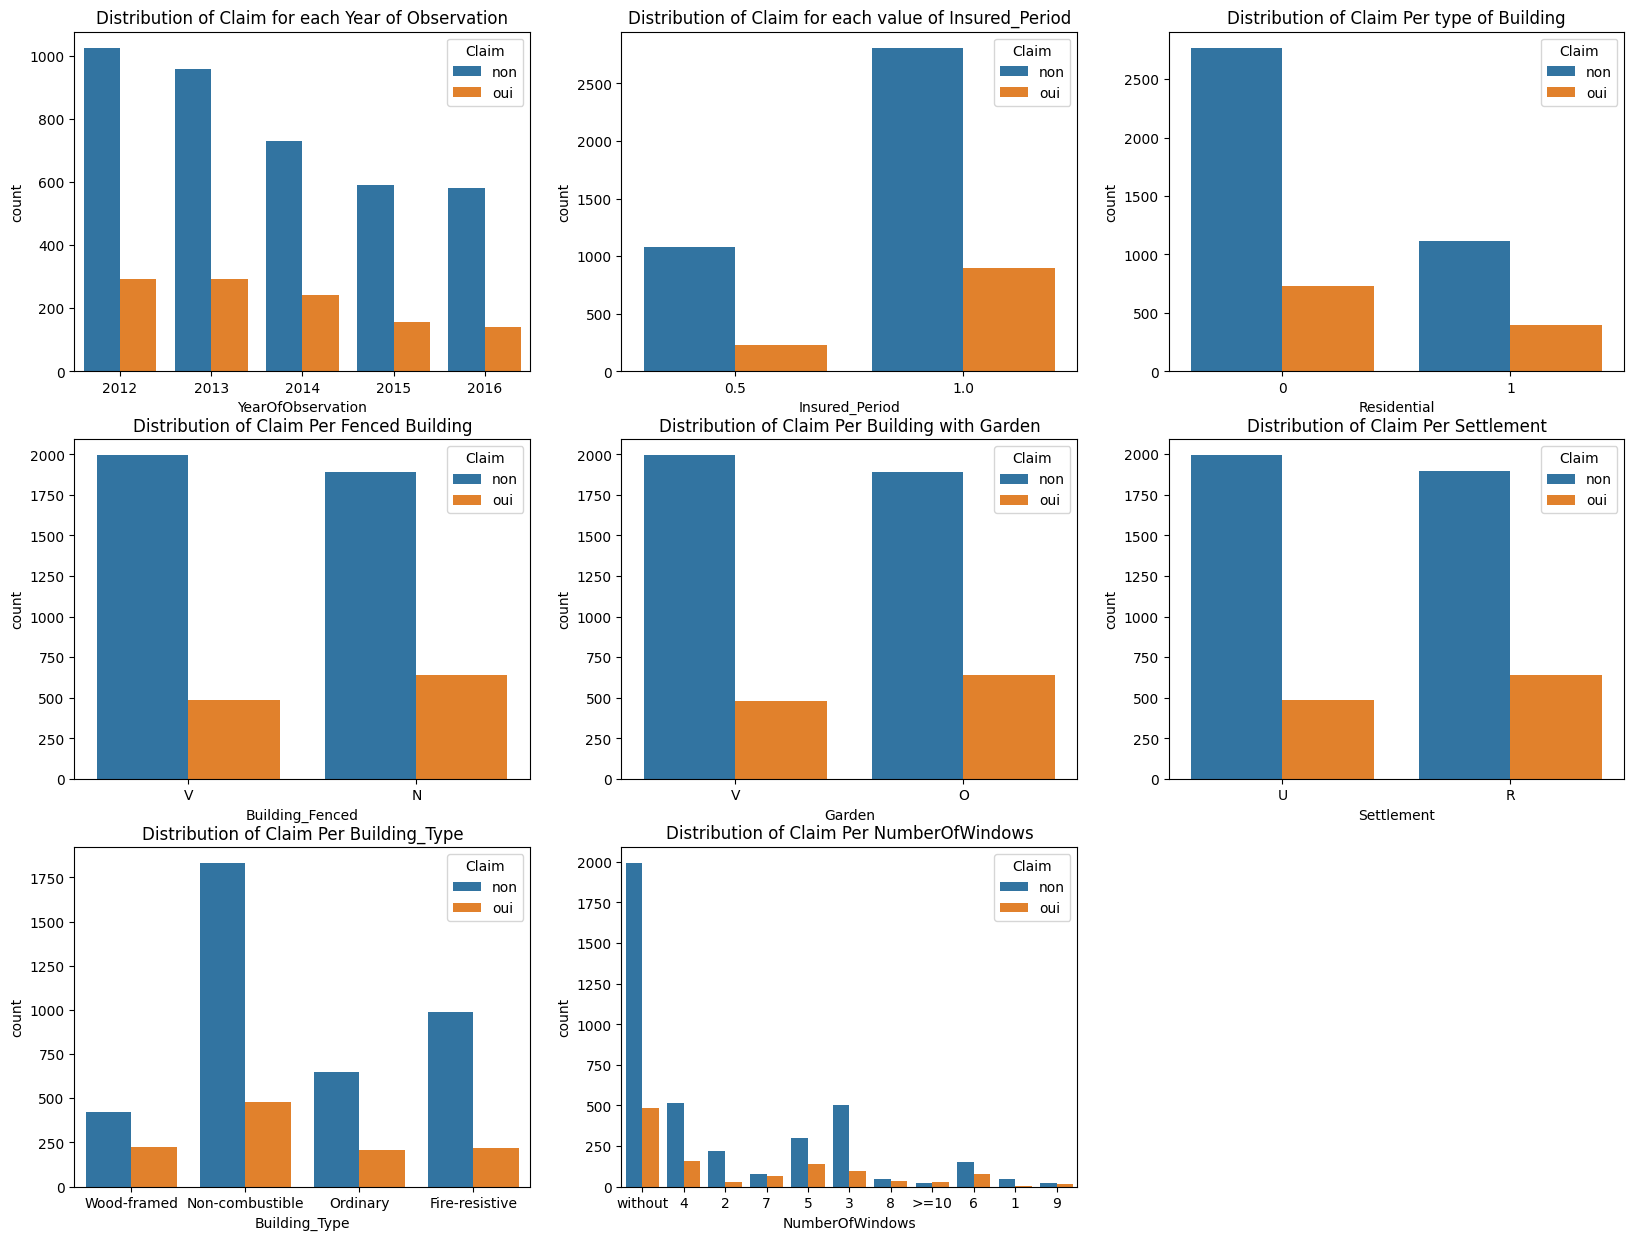

In [13]:
plt.figure(figsize=(20, 15))
plt.subplot(3,3,1)
sns.countplot(x='YearOfObservation', hue='Claim', data=df_train)
plt.title('Distribution of Claim for each Year of Observation')
plt.subplot(3,3,2)
sns.countplot(x='Insured_Period', hue='Claim', data=df_train)
plt.title('Distribution of Claim for each value of Insured_Period')
plt.subplot(3,3,3)
sns.countplot(x='Residential', hue='Claim', data=df_train)
plt.title('Distribution of Claim Per type of Building')
plt.subplot(3,3,4)
sns.countplot(x='Building_Fenced', hue='Claim', data=df_train)
plt.title('Distribution of Claim Per Fenced Building')
plt.subplot(3,3,5)
sns.countplot(x='Garden', hue='Claim', data=df_train)
plt.title('Distribution of Claim Per Building with Garden')
plt.subplot(3,3,6)
sns.countplot(x='Settlement', hue='Claim', data=df_train)
plt.title('Distribution of Claim Per Settlement')
plt.subplot(3,3,7)
sns.countplot(x='Building_Type', hue='Claim', data=df_train)
plt.title('Distribution of Claim Per Building_Type')
plt.subplot(3,3,8)
sns.countplot(x='NumberOfWindows', hue='Claim', data=df_train)
plt.title('Distribution of Claim Per NumberOfWindows')

plt.show()

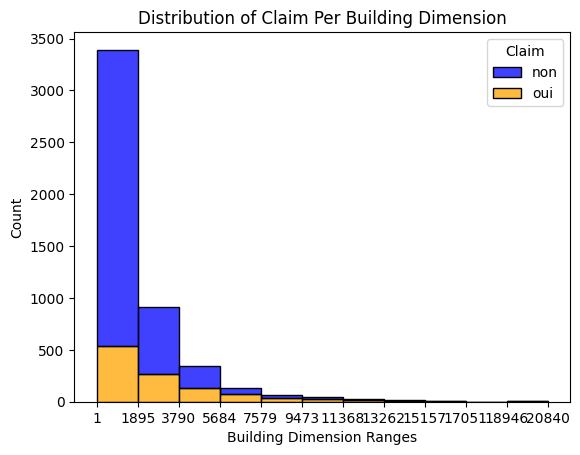

In [14]:
b=np.linspace(df_train["Building Dimension"].min(),df_train["Building Dimension"].max(), 12)
plt.xticks(b)
sns.histplot(data=df_train, hue="Claim", x="Building Dimension", bins=b, multiple="stack", palette=["blue", "orange"]) #stack ca veut dire que qu'on incremente oui et non de claim
plt.title('Distribution of Claim Per Building Dimension')
plt.xlabel('Building Dimension Ranges')
plt.ylabel('Count')
plt.show()

<Axes: ylabel='Building_Painted'>

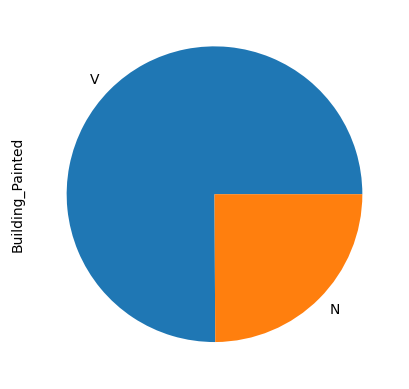

In [15]:
df_train['Building_Painted'].value_counts().plot.pie()


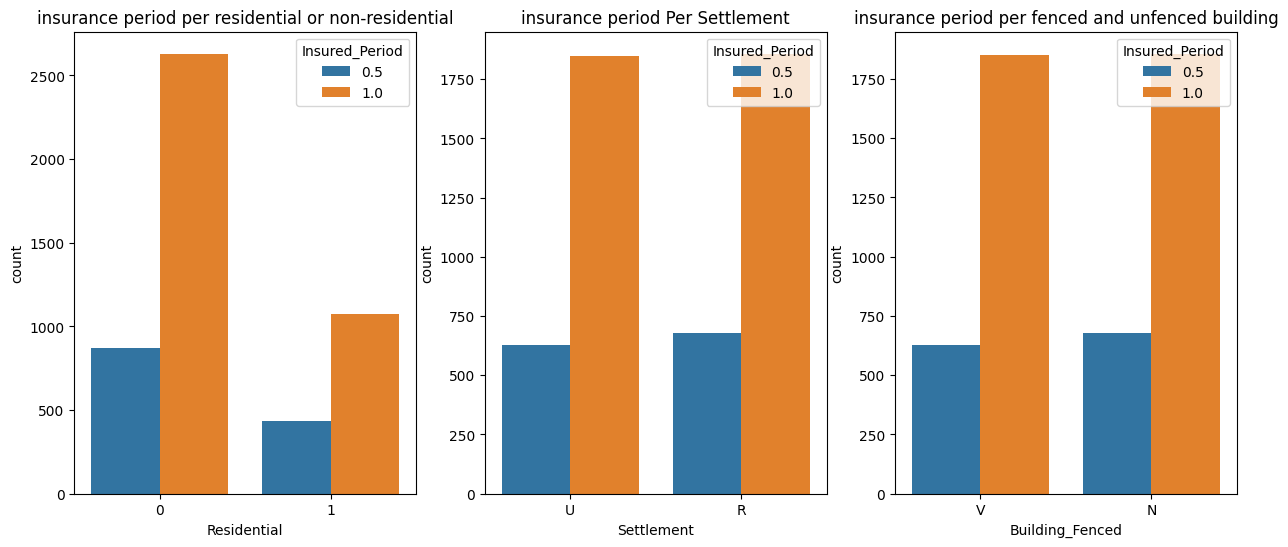

In [16]:
#sns.barplot(x="Insured_Period", y="Residential", data=df_train, ci=None)
plt.figure(figsize=(15, 6))
plt.subplot(1,3,1)
sns.countplot(x='Residential', hue='Insured_Period', data=df_train)
plt.title('insurance period per residential or non-residential')
plt.subplot(1,3,2)
sns.countplot(x='Settlement', hue='Insured_Period', data=df_train)
plt.title('insurance period Per Settlement')
plt.subplot(1,3,3)
sns.countplot(x='Building_Fenced', hue='Insured_Period', data=df_train)
plt.title("insurance period per fenced and unfenced building")
plt.show()

# **Data Cleaning**

In [17]:
mf_imputer = SimpleImputer(missing_values=np.nan,strategy='most_frequent')
df_train['Garden']=mf_imputer.fit_transform(df_train.loc[:,['Garden']])

In [18]:
df_train.isna().sum()

Customer Id            0
YearOfObservation      0
Insured_Period         0
Residential            0
Building_Painted       0
Building_Fenced        0
Garden                 0
Settlement             0
Building Dimension    77
Building_Type          0
NumberOfWindows        0
Geo_Code              73
Claim                  0
dtype: int64

In [19]:
#on peut remplacer les nan dans builing dimension par median , et dans geo_code par des valeurs par hasard ou par des valeurs precis en utilisant fillna
#apres on determine les duplica
#on traite apres les valeurs abberantes en utilisant le boxplot

In [20]:
mf_imputer = SimpleImputer(missing_values=np.nan,strategy='median')
df_train['Building Dimension']=mf_imputer.fit_transform(df_train.loc[:,['Building Dimension']])

In [21]:
df_train.isna().sum()

Customer Id            0
YearOfObservation      0
Insured_Period         0
Residential            0
Building_Painted       0
Building_Fenced        0
Garden                 0
Settlement             0
Building Dimension     0
Building_Type          0
NumberOfWindows        0
Geo_Code              73
Claim                  0
dtype: int64

In [22]:
df_train['Geo_Code'].isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
5007    False
5008    False
5009    False
5010    False
5011     True
Name: Geo_Code, Length: 5012, dtype: bool

In [23]:
df_train['Geo_Code'].fillna(0, inplace=True)

In [24]:
df_train.isna().sum()

Customer Id           0
YearOfObservation     0
Insured_Period        0
Residential           0
Building_Painted      0
Building_Fenced       0
Garden                0
Settlement            0
Building Dimension    0
Building_Type         0
NumberOfWindows       0
Geo_Code              0
Claim                 0
dtype: int64

In [25]:
df_train['Geo_Code']

0       75117
1       62916
2       31149
3        6012
4       57631
        ...  
5007    33063
5008    13004
5009    94059
5010    74243
5011        0
Name: Geo_Code, Length: 5012, dtype: object

In [26]:
df1=df_train[df_train.duplicated()]

In [27]:
df1
# =>pas de duplica

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,NumberOfWindows,Geo_Code,Claim


# **encodage et discretisation**

In [28]:
ord_categories= [["N", "V"],["N", "V"],["O", "V"],["U", "R"],['Fire-resistive', 'Non-combustible','Ordinary', 'Wood-framed']]
enc1 = OrdinalEncoder(categories=ord_categories)
df_train[["Building_Painted","Building_Fenced","Garden","Settlement","Building_Type"]]=enc1.fit_transform(df_train.loc[:,["Building_Painted", "Building_Fenced","Garden","Settlement","Building_Type"]])

In [29]:
df_train

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,NumberOfWindows,Geo_Code,Claim
0,H13501,2012,1.0,1,0.0,1.0,1.0,0.0,1240.0,3.0,without,75117,non
1,H14962,2012,1.0,0,0.0,1.0,1.0,0.0,900.0,1.0,without,62916,non
2,H17755,2013,1.0,1,1.0,0.0,0.0,1.0,4984.0,1.0,4,31149,oui
3,H13369,2016,0.5,0,0.0,1.0,1.0,0.0,600.0,3.0,without,6012,oui
4,H12988,2012,1.0,0,0.0,1.0,1.0,0.0,900.0,1.0,without,57631,non
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5007,H13682,2013,1.0,0,0.0,1.0,1.0,0.0,550.0,2.0,without,33063,oui
5008,H18342,2012,0.5,0,1.0,0.0,0.0,1.0,1000.0,0.0,4,13004,non
5009,H16892,2015,1.0,1,1.0,0.0,0.0,1.0,480.0,2.0,3,94059,non
5010,H18805,2012,0.5,0,1.0,0.0,0.0,1.0,536.0,0.0,4,74243,non


In [30]:
enc = KBinsDiscretizer(n_bins=4, encode='ordinal',strategy='quantile', subsample=len(df_train))
df_train['Building Dimension'] = enc.fit_transform(df_train[['Building Dimension']])

In [31]:
df_train

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,NumberOfWindows,Geo_Code,Claim
0,H13501,2012,1.0,1,0.0,1.0,1.0,0.0,2.0,3.0,without,75117,non
1,H14962,2012,1.0,0,0.0,1.0,1.0,0.0,1.0,1.0,without,62916,non
2,H17755,2013,1.0,1,1.0,0.0,0.0,1.0,3.0,1.0,4,31149,oui
3,H13369,2016,0.5,0,0.0,1.0,1.0,0.0,1.0,3.0,without,6012,oui
4,H12988,2012,1.0,0,0.0,1.0,1.0,0.0,1.0,1.0,without,57631,non
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5007,H13682,2013,1.0,0,0.0,1.0,1.0,0.0,1.0,2.0,without,33063,oui
5008,H18342,2012,0.5,0,1.0,0.0,0.0,1.0,1.0,0.0,4,13004,non
5009,H16892,2015,1.0,1,1.0,0.0,0.0,1.0,0.0,2.0,3,94059,non
5010,H18805,2012,0.5,0,1.0,0.0,0.0,1.0,1.0,0.0,4,74243,non


In [32]:
df_train['NumberOfWindows'] = df_train['NumberOfWindows'].replace('without', 0)

In [33]:
df_train

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,NumberOfWindows,Geo_Code,Claim
0,H13501,2012,1.0,1,0.0,1.0,1.0,0.0,2.0,3.0,0,75117,non
1,H14962,2012,1.0,0,0.0,1.0,1.0,0.0,1.0,1.0,0,62916,non
2,H17755,2013,1.0,1,1.0,0.0,0.0,1.0,3.0,1.0,4,31149,oui
3,H13369,2016,0.5,0,0.0,1.0,1.0,0.0,1.0,3.0,0,6012,oui
4,H12988,2012,1.0,0,0.0,1.0,1.0,0.0,1.0,1.0,0,57631,non
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5007,H13682,2013,1.0,0,0.0,1.0,1.0,0.0,1.0,2.0,0,33063,oui
5008,H18342,2012,0.5,0,1.0,0.0,0.0,1.0,1.0,0.0,4,13004,non
5009,H16892,2015,1.0,1,1.0,0.0,0.0,1.0,0.0,2.0,3,94059,non
5010,H18805,2012,0.5,0,1.0,0.0,0.0,1.0,1.0,0.0,4,74243,non


In [34]:
df_train.drop(labels=["Customer Id","Geo_Code"], axis=1, inplace=True)

In [35]:
df_train

,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,NumberOfWindows,Claim
0,2012,1.0,1,0.0,1.0,1.0,0.0,2.0,3.0,0,non
1,2012,1.0,0,0.0,1.0,1.0,0.0,1.0,1.0,0,non
2,2013,1.0,1,1.0,0.0,0.0,1.0,3.0,1.0,4,oui
3,2016,0.5,0,0.0,1.0,1.0,0.0,1.0,3.0,0,oui
4,2012,1.0,0,0.0,1.0,1.0,0.0,1.0,1.0,0,non
...,...,...,...,...,...,...,...,...,...,...,...
5007,2013,1.0,0,0.0,1.0,1.0,0.0,1.0,2.0,0,oui
5008,2012,0.5,0,1.0,0.0,0.0,1.0,1.0,0.0,4,non
5009,2015,1.0,1,1.0,0.0,0.0,1.0,0.0,2.0,3,non
5010,2012,0.5,0,1.0,0.0,0.0,1.0,1.0,0.0,4,non


In [36]:
df_train.dtypes

YearOfObservation       int64
Insured_Period        float64
Residential             int64
Building_Painted      float64
Building_Fenced       float64
Garden                float64
Settlement            float64
Building Dimension    float64
Building_Type         float64
NumberOfWindows        object
Claim                  object
dtype: object

In [37]:
df_train['NumberOfWindows'] = df_train['NumberOfWindows'].replace('>=10', 10)
df_train['NumberOfWindows'] = pd.to_numeric(df_train['NumberOfWindows'])
df_train.dtypes

YearOfObservation       int64
Insured_Period        float64
Residential             int64
Building_Painted      float64
Building_Fenced       float64
Garden                float64
Settlement            float64
Building Dimension    float64
Building_Type         float64
NumberOfWindows         int64
Claim                  object
dtype: object

In [38]:
thresholder = VarianceThreshold()
v = thresholder.fit(df_train.iloc[:,:-1])
print(v.variances_)

[1.91267896 0.04816887 0.2104298  0.18710032 0.24996652 0.24996417
 0.24996174 1.25026513 0.88918069 6.42793035]


In [39]:
thresholder1= VarianceThreshold(threshold=0.3)
data_high_variance = thresholder1.fit_transform(df_train.iloc[:,:-1])
v1= thresholder1.fit(df_train.iloc[:,:-1])
print(v1.variances_)

[1.91267896 0.04816887 0.2104298  0.18710032 0.24996652 0.24996417
 0.24996174 1.25026513 0.88918069 6.42793035]


In [40]:
path2="/content/drive/MyDrive/test_Insurance.csv"
df_test=pd.read_csv(path2)
df_test.head()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,NumberOfWindows,Geo_Code,Claim
0,H3733,2013,1.0,0,V,V,V,U,3760.0,Fire-resistive,without,43157,oui
1,H16909,2015,1.0,0,V,N,O,R,1452.0,Fire-resistive,5,58194,non
2,H16867,2013,1.0,1,V,N,O,R,1944.0,Ordinary,6,92050,oui
3,H14813,2015,1.0,0,N,V,V,U,2270.0,Non-combustible,without,13209,oui
4,H3728,2016,0.5,0,V,N,O,R,2976.0,Fire-resistive,9,5177,non


In [41]:
df_test.isna().sum()

Customer Id            0
YearOfObservation      0
Insured_Period         0
Residential            0
Building_Painted       0
Building_Fenced        0
Garden                 3
Settlement             0
Building Dimension    29
Building_Type          0
NumberOfWindows        0
Geo_Code              29
Claim                  0
dtype: int64

In [42]:
mf_imputer = SimpleImputer(missing_values=np.nan,strategy='most_frequent')
df_test['Garden']=mf_imputer.fit_transform(df_test.loc[:,['Garden']])
imputer = SimpleImputer(missing_values=np.nan,strategy='median')
df_test['Building Dimension']=imputer.fit_transform(df_test.loc[:,['Building Dimension']])
df_test['Geo_Code'].fillna(0, inplace=True)
ord_categories= [["N", "V"],["N", "V"],["O", "V"],["U", "R"],['Fire-resistive', 'Non-combustible','Ordinary', 'Wood-framed']]
enc1 = OrdinalEncoder(categories=ord_categories)
df_test[["Building_Painted","Building_Fenced","Garden","Settlement","Building_Type"]]=enc1.fit_transform(df_test.loc[:,["Building_Painted",
"Building_Fenced","Garden","Settlement","Building_Type"]])
enc = KBinsDiscretizer(n_bins=4, encode='ordinal',strategy='quantile', subsample=len(df_test))
df_test['Building Dimension'] = enc.fit_transform(df_test[['Building Dimension']])
df_test['NumberOfWindows'] = df_test['NumberOfWindows'].replace('without', 0)
df_test.drop(labels=["Customer Id","Geo_Code"], axis=1, inplace=True)
df_test['NumberOfWindows'] = df_test['NumberOfWindows'].replace('>=10', 10)
df_test['NumberOfWindows'] = pd.to_numeric(df_test['NumberOfWindows'])


In [43]:
df_test

,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,NumberOfWindows,Claim
0,2013,1.0,0,1.0,1.0,1.0,0.0,3.0,0.0,0,oui
1,2015,1.0,0,1.0,0.0,0.0,1.0,2.0,0.0,5,non
2,2013,1.0,1,1.0,0.0,0.0,1.0,2.0,2.0,6,oui
3,2015,1.0,0,0.0,1.0,1.0,0.0,2.0,1.0,0,oui
4,2016,0.5,0,1.0,0.0,0.0,1.0,3.0,0.0,9,non
...,...,...,...,...,...,...,...,...,...,...,...
2142,2016,0.5,1,1.0,0.0,0.0,1.0,1.0,3.0,2,non
2143,2012,1.0,0,1.0,1.0,1.0,0.0,2.0,1.0,0,non
2144,2014,1.0,0,1.0,0.0,0.0,1.0,1.0,1.0,3,non
2145,2014,1.0,1,0.0,1.0,1.0,0.0,1.0,1.0,0,oui


In [44]:
df_test.isnull().sum()

YearOfObservation     0
Insured_Period        0
Residential           0
Building_Painted      0
Building_Fenced       0
Garden                0
Settlement            0
Building Dimension    0
Building_Type         0
NumberOfWindows       0
Claim                 0
dtype: int64

In [45]:
df_test.dtypes

YearOfObservation       int64
Insured_Period        float64
Residential             int64
Building_Painted      float64
Building_Fenced       float64
Garden                float64
Settlement            float64
Building Dimension    float64
Building_Type         float64
NumberOfWindows         int64
Claim                  object
dtype: object

In [46]:
X_train= df_train.iloc[:, :-1].values
Y_train= df_train.iloc[:, -1].values
X_test= df_test.iloc[:, :-1].values
Y_test= df_test.iloc[:, -1].values
print(type(X_train), X_train.shape)
print(type(Y_train), Y_train.shape)
print(type(X_test), X_test.shape)
print(type(Y_test), Y_test.shape)

<class 'numpy.ndarray'> (5012, 10)
<class 'numpy.ndarray'> (5012,)
<class 'numpy.ndarray'> (2147, 10)
<class 'numpy.ndarray'> (2147,)


In [47]:
cls = DecisionTreeClassifier()
cls.fit(X_train, Y_train)

DecisionTreeClassifier()

In [48]:
print(cls.classes_)
print(list(df_train))

['non' 'oui']
['YearOfObservation', 'Insured_Period', 'Residential', 'Building_Painted', 'Building_Fenced', 'Garden', 'Settlement', 'Building Dimension', 'Building_Type', 'NumberOfWindows', 'Claim']


In [49]:
#from sklearn.tree import plot_tree, export_text

#fig=plt.figure(figsize=(25,20))
#plot_tree(cls, feature_names=list(df_train)[:-1],class_names=list(cls.classes_), filled=True)
#plt.show()
#print(export_text(cls, feature_names=list(df_train)[:-1]))

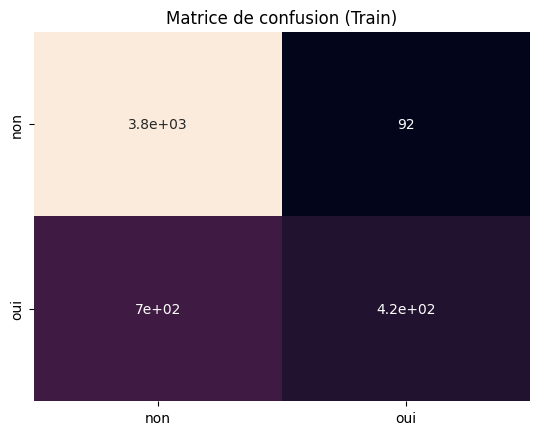

In [50]:
Y_p_train=cls.predict(X_train)
c_m_train=confusion_matrix(Y_train, Y_p_train)
sns.heatmap(c_m_train, annot=True, cbar=False,xticklabels=cls.classes_, yticklabels=cls.classes_)
plt.title('Matrice de confusion (Train)')
plt.show()


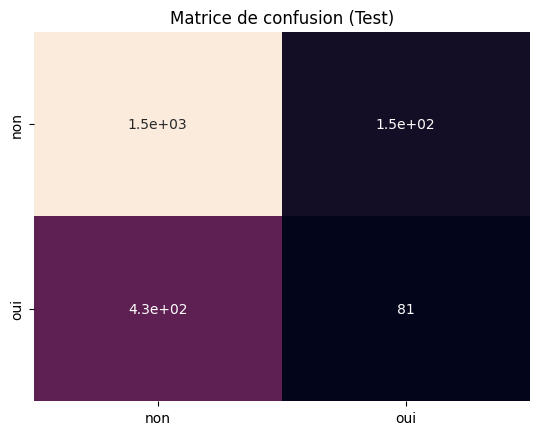

In [51]:
Y_p_test=cls.predict(X_test)
c_m_test=confusion_matrix(Y_test, Y_p_test)
sns.heatmap(c_m_test, annot=True, cbar=False,xticklabels=cls.classes_, yticklabels=cls.classes_)
plt.title('Matrice de confusion (Test)')
plt.show()

In [52]:
from sklearn.metrics import precision_recall_fscore_support, roc_curve, roc_auc_score

precision,recall,f1,occ= precision_recall_fscore_support(Y_test,Y_p_test, average=None)
print(precision, recall, f1, occ)


[0.77713987 0.35064935] [0.90848078 0.15944882] [0.83769339 0.21921516] [1639  508]


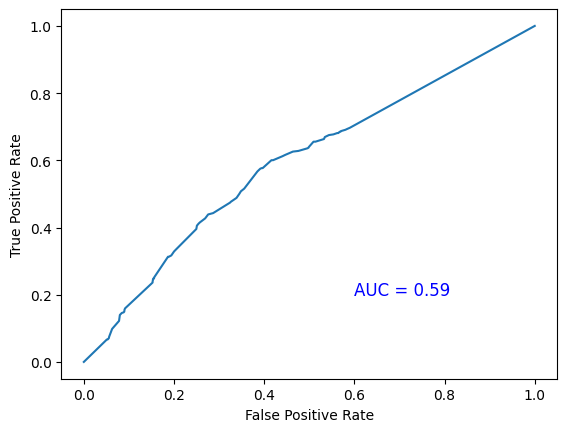

In [53]:
y_prob=cls.predict_proba(X_test)[:,1]
fpr,tpr,thresholds = roc_curve(Y_test,y_prob,pos_label='oui')
auc = roc_auc_score(Y_test, y_prob)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.text(0.6, 0.2, f'AUC = {auc:.2f}',color='blue',fontsize=12)
plt.show()

In [54]:
print(accuracy_score(Y_train, Y_p_train))
print(accuracy_score(Y_test, Y_p_test))

0.8413806863527534
0.7312529110386586


In [55]:
df_train.to_csv('/content/drive/MyDrive/train_insurrance_preprocess.csv', index=False)
df_test.to_csv('/content/drive/MyDrive/test_insurrance_preprocess.csv', index=False)